<a href="https://colab.research.google.com/github/Abhay2358/Arduino/blob/main/ObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 9.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [3]:
from ultralytics import YOLO
model = YOLO("yolov8m.pt")


100%|██████████| 49.7M/49.7M [00:01<00:00, 51.7MB/s]


In [4]:
model = YOLO("yolov8m.pt")

In [17]:
results = model.predict("cat_dog1.jpg")



image 1/1 /content/cat_dog1.jpg: 384x640 3 birds, 8 cats, 23 dogs, 1 bear, 762.3ms
Speed: 2.9ms preprocess, 762.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


In [19]:
result = results[0]

In [20]:
len(result.boxes)

35

In [21]:
box = result.boxes[0]

In [22]:
print("Object type:", box.cls)
print("Coordinates:", box.xyxy)
print("Probability:", box.conf)

Object type: tensor([14.])
Coordinates: tensor([[245.5260,  20.8068, 394.8020, 145.3000]])
Probability: tensor([0.8967])


In [23]:
print("Object type:",box.cls[0])
print("Coordinates:",box.xyxy[0])
print("Probability:",box.conf[0])

Object type: tensor(14.)
Coordinates: tensor([245.5260,  20.8068, 394.8020, 145.3000])
Probability: tensor(0.8967)


In [24]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 14.0
Coordinates: [245.5260009765625, 20.806758880615234, 394.8020324707031, 145.300048828125]
Probability: 0.8966600298881531


In [25]:
cords = box.xyxy[0].tolist()
cords = [round(x) for x in cords]
class_id = result.names[box.cls[0].item()]
conf = round(box.conf[0].item(), 2)
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: bird
Coordinates: [246, 21, 395, 145]
Probability: 0.9


In [26]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: bird
Coordinates: [246, 21, 395, 145]
Probability: 0.9
---
Object type: dog
Coordinates: [658, 158, 799, 342]
Probability: 0.89
---
Object type: dog
Coordinates: [235, 340, 455, 506]
Probability: 0.88
---
Object type: dog
Coordinates: [18, 168, 139, 341]
Probability: 0.87
---
Object type: dog
Coordinates: [1055, 40, 1196, 365]
Probability: 0.84
---
Object type: dog
Coordinates: [917, 31, 1067, 353]
Probability: 0.84
---
Object type: dog
Coordinates: [128, 152, 243, 349]
Probability: 0.81
---
Object type: dog
Coordinates: [963, 410, 1031, 519]
Probability: 0.79
---
Object type: bird
Coordinates: [195, 89, 295, 158]
Probability: 0.74
---
Object type: cat
Coordinates: [232, 537, 346, 657]
Probability: 0.69
---
Object type: cat
Coordinates: [146, 349, 225, 511]
Probability: 0.69
---
Object type: dog
Coordinates: [319, 460, 448, 662]
Probability: 0.68
---
Object type: dog
Coordinates: [824, 362, 976, 511]
Probability: 0.66
---
Object type: dog
Coordinates: [1033, 369, 1143, 508

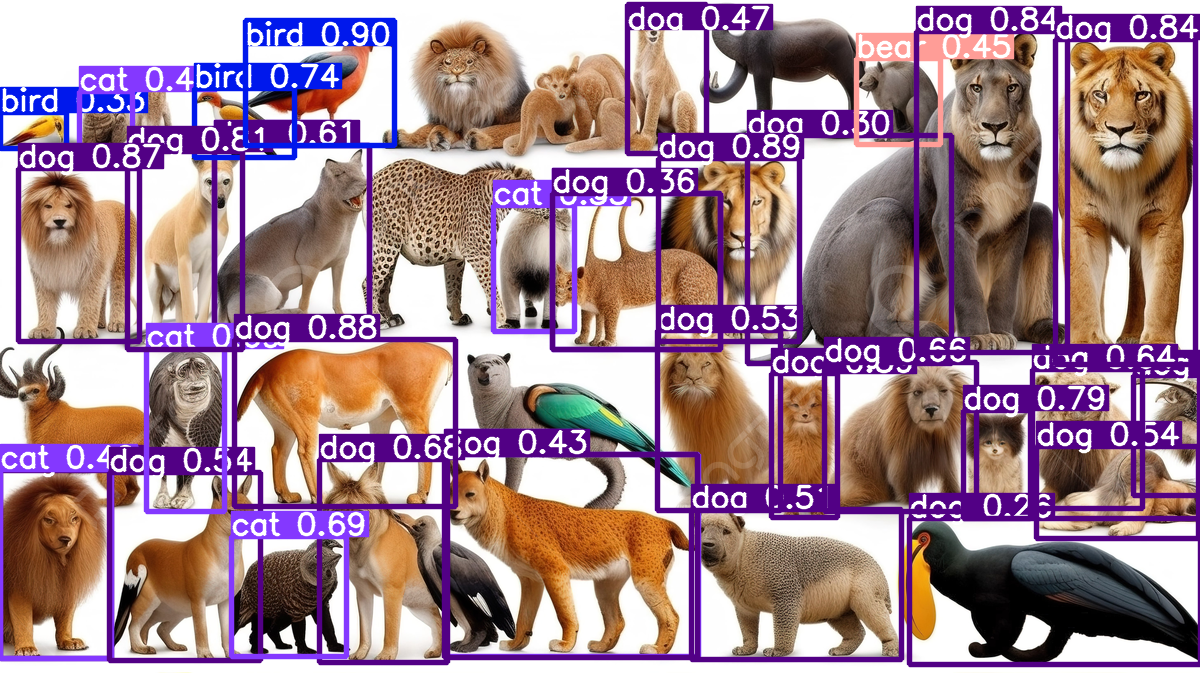

In [27]:
from PIL import Image
Image.fromarray(result.plot()[:,:,::-1])